Pokemon dataset can't be applied for this task, so let's stick to standart keras one

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

constants

In [ ]:
batch_size = 128
classes_amount = 10
epochs_amount = 20

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


pixels should hold values from 0 to 1

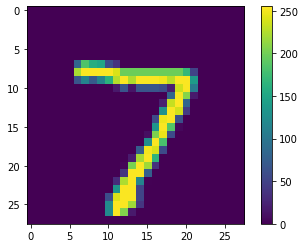

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

split the data between train and test sets and reshape it

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255
print(x_train.shape)

(60000, 784)


transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes - so-called "one-hot vector"

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, classes_amount)
y_test = tensorflow.keras.utils.to_categorical(y_test, classes_amount)

(60000, 784)


building a model - first draft

In [ ]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(classes_amount, activation='sigmoid'))

In [ ]:
# it's a probabilistic loss, so mean squared error won't fit - it's for regression
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

training

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs_amount,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5140 - accuracy: 0.8565 - val_loss: 0.2368 - val_accuracy: 0.9297
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9394 - val_loss: 0.1745 - val_accuracy: 0.9463
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1497 - accuracy: 0.9552 - val_loss: 0.1338 - val_accuracy: 0.9599
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1156 - accuracy: 0.9663 - val_loss: 0.1183 - val_accuracy: 0.9626
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9730 - val_loss: 0.0982 - val_accuracy: 0.9697
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0775 - val_accuracy: 0.9760
Epoch 

In [ ]:
train_score = model.evaluate(x_train, y_train, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.003756352700293064
Train accuracy: 0.9991333484649658
Test loss: 0.07425758242607117
Test accuracy: 0.98089998960495


predictions

In [ ]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))

[5.3685600e-10 9.2479773e-08 6.2000595e-07 1.6399258e-06 2.5730743e-10
 2.3389354e-10 6.0250919e-15 9.5033652e-01 2.9284775e-10 1.1939706e-07]
7


relu: 
```
Train loss: 0.25386878848075867
Train accuracy: 0.9566166400909424
Test loss: 0.3168814182281494
Test accuracy: 0.9487000107765198
```



sigmoid:


```
Train loss: 0.0022315492387861013
Train accuracy: 0.9996833205223083
Test loss: 0.07336705178022385
Test accuracy: 0.9825000166893005
```



softmax


```
Train loss: 0.2632957994937897
Train accuracy: 0.9374833106994629
Test loss: 0.30331969261169434
Test accuracy: 0.9266999959945679
```



so far sigmoid looks like an optimal choice

let's decrease training sets' sizes tenfold

reshaping everything

In [ ]:
new_x_train = x_train[:6000]
new_x_test = x_test[:1000]
new_x_train = new_x_train.reshape(6000, 784)
new_x_test = new_x_test.reshape(1000, 784)

new_x_train = new_x_train.astype('float32')
new_x_test = new_x_test.astype('float32')
new_x_train /= 255
new_x_test /= 255 

new_y_train = y_train[:6000]
new_y_test = y_test[:1000]
new_y_train = tensorflow.keras.utils.to_categorical(new_y_train, classes_amount)
new_y_test = tensorflow.keras.utils.to_categorical(new_y_test, classes_amount)

print(x_train.shape)
print(new_x_train.shape)
print(y_train.shape)
print(new_y_train.shape)

(60000, 784)
(6000, 784)
(60000, 10)
(6000, 10, 10)


with decreased amount of data, this model's accuracy drops to 92%, though gets faster to train

regularization helps with overfitting, but in this case there's no such a problem, so let's create it by increasing num of epochs

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model_reg.add(Dense(256, activation='sigmoid'))
model_reg.add(Dense(classes_amount, activation='sigmoid')) 



In [ ]:
model_reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
history = model_reg.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/1000
469/469 [==============================] - 1s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9845
Epoch 2/1000
469/469 [==============================] - 1s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9845
Epoch 3/1000
469/469 [==============================] - 2s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9845
Epoch 4/1000
469/469 [==============================] - 1s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9845
Epoch 5/1000
469/469 [==============================] - 1s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9845
Epoch 6/1000
469/469 [==============================] - 1s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9845
Epoch 7/1000
469/469 [==============================] - 1s 3ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_

it worked, we have an overfit

In [ ]:
train_score_model_reg = model_reg.evaluate(x_train, y_train, verbose=0)
score_model_reg = model_reg.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score_model_reg[0])
print('Train accuracy:', train_score_model_reg[1])
print('Test loss:', score_model_reg[0])
print('Test accuracy:', score_model_reg[1])

Train loss: 1.1920930376163597e-07
Train accuracy: 1.0
Test loss: 0.12895111739635468
Test accuracy: 0.984499990940094


now let's use kernel_regularizer

the L2 regularization penalty is computed as: loss = l2 * reduce_sum(square(x))

The L1 regularization penalty is computed as: loss = l1 * reduce_sum(abs(x))

In [ ]:
kernel_regularizer = regularizers.l2(0.0001)

In [ ]:
model_reg_l1 = Sequential()
#l2 kernel regularizer
model_reg_l1.add(Dense(512, 
                kernel_regularizer=kernel_regularizer,
                activation='sigmoid', input_shape=(784,)))
model_reg_l1.add(Dense(256,
                kernel_regularizer=kernel_regularizer,
                activation='sigmoid'))
model_reg_l1.add(Dense(classes_amount, activation='sigmoid')) 

In [ ]:
model_reg_l1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
history = model_reg_l1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.6280 - accuracy: 0.8616 - val_loss: 0.3721 - val_accuracy: 0.9227
Epoch 2/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.9283 - val_loss: 0.3188 - val_accuracy: 0.9359
Epoch 3/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.3020 - accuracy: 0.9419 - val_loss: 0.2748 - val_accuracy: 0.9480
Epoch 4/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.2731 - accuracy: 0.9502 - val_loss: 0.2479 - val_accuracy: 0.9577
Epoch 5/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9579 - val_loss: 0.2358 - val_accuracy: 0.9595
Epoch 6/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 0.9618 - val_loss: 0.2206 - val_accuracy: 0.9675
Epoch 7/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.2193 - accuracy: 0.9661 - val_loss: 0.2157 - val_accuracy:

It affected the result - the difference between train and test accuracy somewhat decreased

val loss ± the same, training loss got much bigger


In [ ]:
train_score_model_reg_l1 = model_reg_l1.evaluate(x_train, y_train, verbose=0)
score_model_reg_l1 = model_reg_l1.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score_model_reg_l1[0])
print('Train accuracy:', train_score_model_reg_l1[1])
print('Test loss:', score_model_reg_l1[0])
print('Test accuracy:', score_model_reg_l1[1])

Train loss: 0.05464416369795799
Train accuracy: 0.994866669178009
Test loss: 0.11323735117912292
Test accuracy: 0.9764999747276306


let's add dropout layers to this model

they are going to randomly set input units to 0 with a frequency of 0.2

In [ ]:
model_dropout = Sequential()
model_dropout.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(256, activation='sigmoid'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(classes_amount, activation='sigmoid'))

In [ ]:
model_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
history = model_dropout.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.5804 - accuracy: 0.8273 - val_loss: 0.2444 - val_accuracy: 0.9266
Epoch 2/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.9283 - val_loss: 0.1775 - val_accuracy: 0.9452
Epoch 3/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1808 - accuracy: 0.9463 - val_loss: 0.1382 - val_accuracy: 0.9576
Epoch 4/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1448 - accuracy: 0.9567 - val_loss: 0.1156 - val_accuracy: 0.9648
Epoch 5/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.1154 - accuracy: 0.9654 - val_loss: 0.1002 - val_accuracy: 0.9693
Epoch 6/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0972 - accuracy: 0.9709 - val_loss: 0.0862 - val_accuracy: 0.9740
Epoch 7/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0807 - accuracy: 0.9748 - val_loss: 0.0766 - val_accuracy:

In [ ]:
train_score_model_dropout = model_dropout.evaluate(x_train, y_train, verbose=0)
score_model_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score_model_dropout[0])
print('Train accuracy:', train_score_model_dropout[1])
print('Test loss:', score_model_dropout[0])
print('Test accuracy:', score_model_dropout[1])

Train loss: 2.2293336598977476e-07
Train accuracy: 1.0
Test loss: 0.1477537453174591
Test accuracy: 0.9848999977111816


tendency is pretty much the same, but dropout is faster and accuracies coincide even better. loss differs more though.

let's perform the xavier init 

In [ ]:
from tensorflow.keras import initializers

In [ ]:
# The Glorot normal initializer, also called Xavier normal initializer.
initializer = tf.keras.initializers.GlorotNormal()

In [ ]:
model_xavier = Sequential()
model_xavier.add(Dense(512, kernel_initializer=initializer, activation='sigmoid', input_shape=(784,))) 
model_xavier.add(Dense(256, kernel_initializer=initializer,activation='sigmoid')) 
model_xavier.add(Dense(classes_amount, kernel_initializer=initializer,activation='sigmoid'))

In [ ]:
model_xavier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
history = model_xavier.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 0.8625 - val_loss: 0.2321 - val_accuracy: 0.9318
Epoch 2/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.2049 - accuracy: 0.9397 - val_loss: 0.1805 - val_accuracy: 0.9457
Epoch 3/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.1494 - accuracy: 0.9558 - val_loss: 0.1348 - val_accuracy: 0.9587
Epoch 4/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9667 - val_loss: 0.1112 - val_accuracy: 0.9660
Epoch 5/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9730 - val_loss: 0.0997 - val_accuracy: 0.9671
Epoch 6/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9787 - val_loss: 0.0902 - val_accuracy: 0.9712
Epoch 7/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0819 - val_accuracy:

In [ ]:
train_score_model_xavier = model_xavier.evaluate(x_train, y_train, verbose=0)
score_model_xavier = model_xavier.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score_model_xavier[0])
print('Train accuracy:', train_score_model_xavier[1])
print('Test loss:', score_model_xavier[0])
print('Test accuracy:', score_model_xavier[1])

this one didn't help much, because keras uses glorot_uniform by default already.

In conclusion, small dataset may lead to underfit, and excessive number of epochs may lead to overfit. To counter overfit, there's a lot of methods - regularisation, dropout layers and Xavier weight init. regularisation helped more with losses differences, and dropout layers helped more with accuracy differences. Xavier weight init is woven into keras layers by default, so it's hard to say if it made any difference.